### Map of offshore areas considered

In [68]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../EMPIRE_extension/Output/OW_nodes.csv").drop(columns=["geometry"])
df

,Node,Longitude,Latitude
0,Moray Firth,-2.990229,58.170702
1,Firth of Forth,-2.047535,56.363729
2,Dogger Bank,2.333333,54.833333
3,Hornsea,1.845196,53.820112
4,Outer Dowsing,0.905074,53.311186
5,Norfolk,2.168638,52.782831
6,East Anglia,1.883496,51.890054
7,Borssele,3.197221,51.957807
8,Hollandsee Kust,4.008061,52.462704
9,Helgoländer Bucht,7.167722,54.322931


In [69]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for _, point in a.iterrows():
        ax.scatter(point["x"], point["y"])
        ax.text(point['x']+.02, point['y'], str(point['val']))

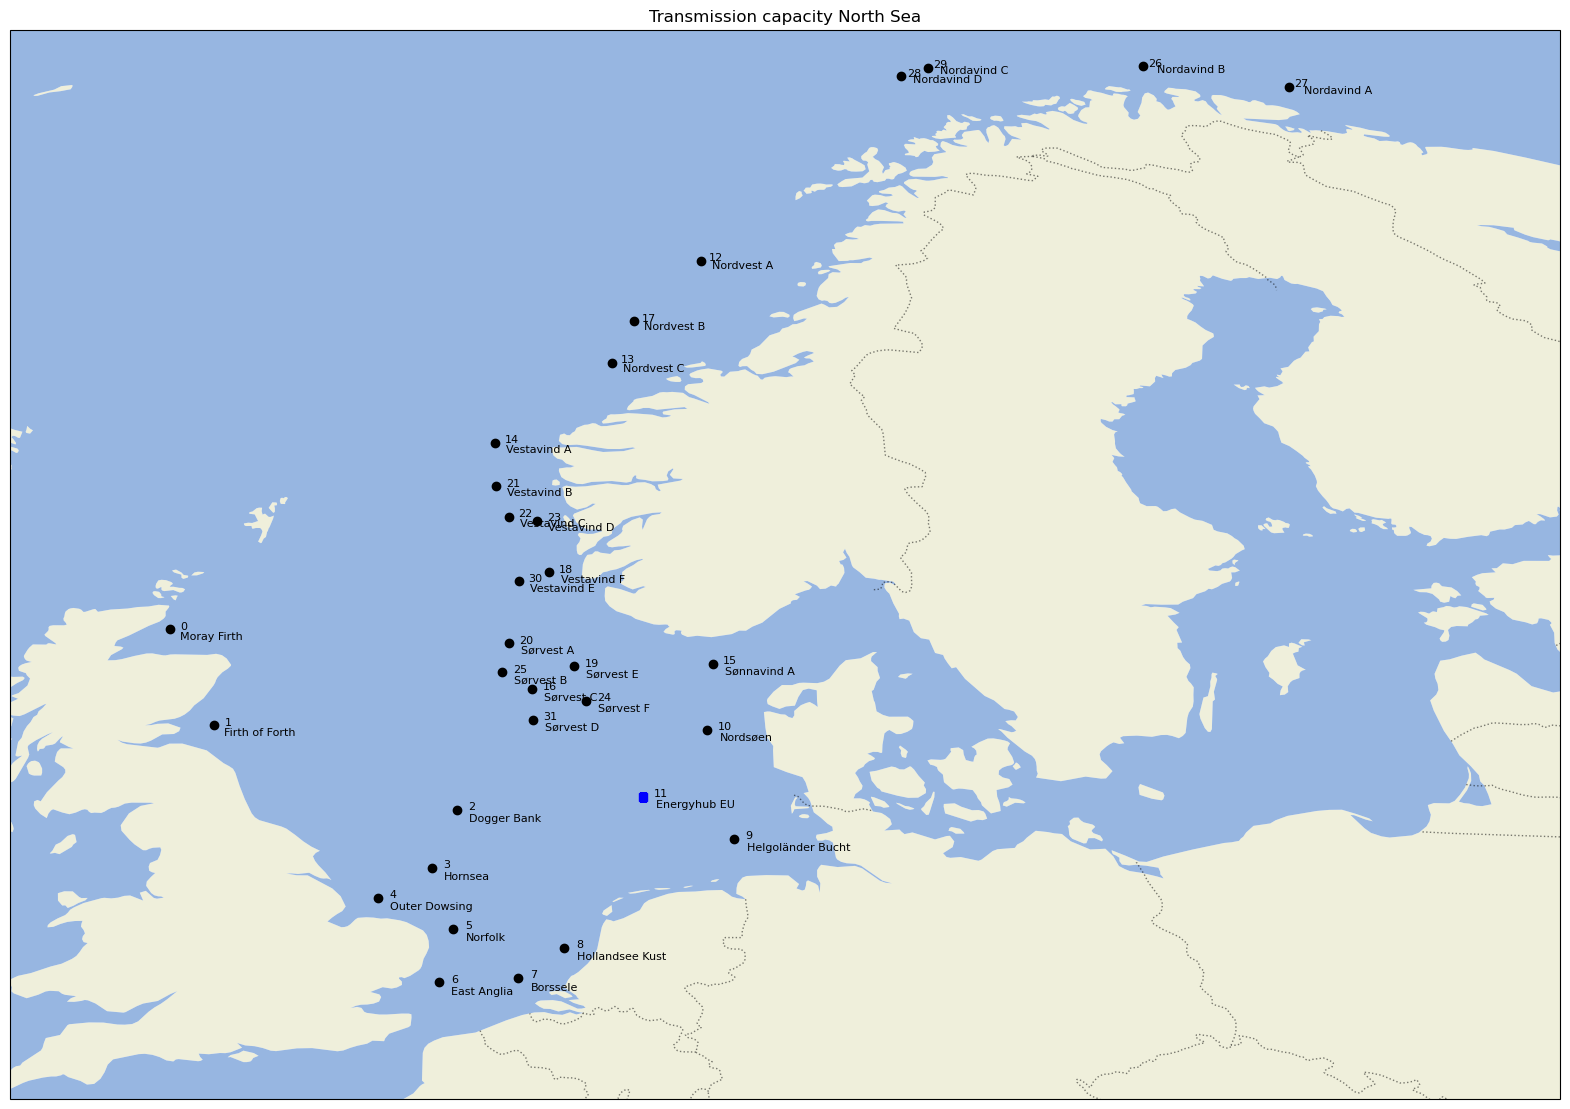

In [85]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Orthographic())
ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), linestyle=':', alpha=.5)
ax.add_feature(cartopy.feature.LAND.with_scale('50m'))
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
for idx, df_row in df.iterrows():
    if df_row["Node"] == "Energyhub EU":
        plt.plot(df_row["Longitude"], df_row["Latitude"], marker="s", color="blue", transform=ccrs.Geodetic())
    else:
        plt.plot(df_row["Longitude"], df_row["Latitude"], marker="o", color="black", transform=ccrs.Geodetic())
    plt.text(df_row["Longitude"]+0.2, df_row["Latitude"], idx, fontsize=8, transform=ccrs.Geodetic())
    plt.text(df_row["Longitude"]+0.2, df_row["Latitude"]-0.2, df_row["Node"], fontsize=8, transform=ccrs.Geodetic())
ax.set_extent([-5, 20, 50, 73], crs=ccrs.PlateCarree())
plt.title('Transmission capacity North Sea')
plt.show()